In [26]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt

from tqdm import tqdm, trange

tf.config.experimental.set_visible_devices([], 'GPU')

In [ ]:
# Taken from https://github.com/tensorflow/tensorflow/issues/31135#issuecomment-516526113
# Set CPU as available physical device
tf.config.experimental.set_visible_devices([], 'GPU')

# Importance Sampling Encoder and Decoder

In [70]:
def importance_encode(target, proposal, kl):
    
    # Get the number of samples that need to be drawn
    num_samples = tf.math.floor(tf.math.exp(kl + 1))
    
    max_index = 0.
    max_weight = float('-inf')
    
    for i in tf.range(num_samples):
        
        sample = proposal.sample()
        weight = tf.reduce_sum(target.log_prob(sample) - proposal.log_prob(sample))
        
        if weight > max_weight:
            max_weight = weight
            max_index = i
            
    return max_weight, max_index

In [71]:
target = tfd.Normal(loc=2., scale=0.4)
proposal = tfd.Normal(loc=0., scale=1.)

kl = tfd.kl_divergence(target, proposal)
print(f"KL between target and proposal: {kl:.4f}")

KL between target and proposal: 2.4963


In [72]:
importance_encode(target=target,
                  proposal=proposal,
                  kl=tfd.kl_divergence(target, proposal))

(<tf.Tensor: id=1187705, shape=(), dtype=float32, numpy=3.1956491>,
 <tf.Tensor: id=1187661, shape=(), dtype=float32, numpy=10.0>)

In [73]:
iters = 100
samps = []

for i in trange(iters):
    
    tf.random.set_seed(i)
    samp, ind = importance_encode(target=target,
                                  proposal=proposal,
                                  kl=tfd.kl_divergence(target, proposal))
    
    samps.append(samp)


100%|██████████| 100/100 [00:05<00:00, 16.98it/s][A


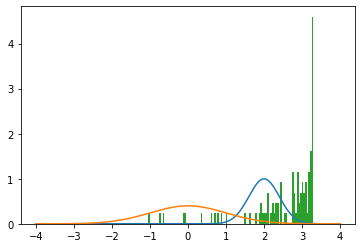

In [74]:
xs = tf.linspace(-4., 4., 300)

plt.plot(xs, target.prob(xs))
plt.plot(xs, proposal.prob(xs))
plt.hist(samps, bins=100, density=True)
plt.show()